In [344]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [345]:
from scipy.misc import imread

In [346]:
import numpy as np

In [398]:
import numpy as np
import matplotlib.pylab as plt 
#################################################################################################
def ShowAmpPhz(A, date='', size=12 , text=False, title='', cmap='gray', save=True, vmin=0) :
    # print( "Top-Left Starting position on the global slice: " , TopLeftPxl )
    #-------------------------------------------------------
    import matplotlib.pyplot as plt 
    #-------------------------------------------------------
    from matplotlib.pyplot import figure ; 
    figsize = size
    matrix  = A 
    figure(facecolor=(1,1,1), num=None,
           figsize=(figsize, figsize ), 
           dpi=80, )
    plt.title(f'{title}\n{date}') 
    plt.imshow( matrix , cmap= cmap,) # origin = 'lower' ) 
    plt.colorbar(  fraction=0.0200, pad=0.11 ) 
    #plt.colorbar( ) 
    #plt.axis('off')
    
    if text == True : 
        for i in range( matrix.shape[1] ):
            for j in range( matrix.shape[0] ):
                c = int(matrix[j,i]*100)/100 # approximation (for better vizualt°)
                plt.text(i, j, str(c), va='center', ha='center') 
    if (save==True) :
        #plt.savefig( f"{title[-30:]}.png" )
        plt.savefig( f"{str(title).replace(' ','_')}.png" )
    plt.show() 
#################################################################################################



def LabelsList() :
    Labels=['',
            'Continuous urban fabric',
            'Discontinuous urban fabric',
            'Industrial or commercial units',
            'Road and rail networks and associated land',
            'Port areas',
            'Airports',
            'Mineral extraction sites',
            'Dump sites',
            'Construction sites',
            'Green urban areas',
            'Sport and leisure facilities',
            'Non-irrigated arable land',
            'Permanently irrigated land',
            'Rice fields',
            'Vineyards',
            'Fruit trees and berry plantations',
            'Olive groves',
            'Pastures',
            'Annual crops associated with permanent crops',
            'Complex cultivation patterns',
            'Agriculture with natural vegetation',
            'Agro-forestry areas',
            'Broad-leaved forest',
            'Coniferous forest',
            'Mixed forest',
            'Natural grasslands',
            'Moors and heathland',
            'Sclerophyllous vegetation',
            'Transitional woodland-shrub',
            'Beaches - dunes - sands',
            'Bare rocks',
            'Sparsely vegetated areas',
            'Burnt areas',
            'Glaciers and perpetual snow',
            'Inland marshes',
            'Peat bogs',
            'Salt marshes',
            'Salines',
            'Intertidal flats',
            'Water courses',
            'Water bodies',
            'Coastal lagoons',
            'Estuaries',
            'Sea and ocean',
            'NODATA',]

    return Labels


def pooling(mat,ksize,method='max',pad=False) :
    import numpy 
    '''Non-overlapping pooling on 2D or 3D data.

    <mat>: ndarray, input array to pool.
    <ksize>: tuple of 2, kernel size in (ky, kx).
    <method>: str, 'max for max-pooling, 
                   'mean' for mean-pooling.
    <pad>: bool, pad <mat> or not. If no pad, output has size
           n//f, n being <mat> size, f being kernel size.
           if pad, output has size ceil(n/f).

    Return <result>: pooled matrix.
    '''

    m, n = mat.shape[:2]
    ky,kx=ksize

    _ceil=lambda x,y: int(numpy.ceil(x/float(y)))

    if pad:
        ny=_ceil(m,ky)
        nx=_ceil(n,kx)
        size=(ny*ky, nx*kx)+mat.shape[2:]
        mat_pad=numpy.full(size,numpy.nan)
        mat_pad[:m,:n,...]=mat
    else:
        ny=m//ky
        nx=n//kx
        mat_pad=mat[:ny*ky, :nx*kx, ...]

    new_shape=(ny,ky,nx,kx)+mat.shape[2:]

    if method=='max':
        result=numpy.nanmax(mat_pad.reshape(new_shape),axis=(1,3))
    else:
        result=numpy.nanmean(mat_pad.reshape(new_shape),axis=(1,3))

    return result



################################################################################
def FindGoodAreas( Matwindow, color , 
                  Kernel = [3,3]  , 
                  startpointC = 0 ,
                  startpointR = 0 ,
                  stepsearchC = 1 ,
                  stepsearchR = 1 ,
                  show=True  ) : 
    import numpy as np 
    Places=np.zeros((Matwindow.shape[0],
                     Matwindow.shape[1])) 
    List_Of_TopLefts = []
    s = 0
    for i in range( startpointR,
                   (Matwindow.shape[0]-(Kernel[0])-1),
                   stepsearchR ) : 
        # on lat 
        for j in range( startpointC, 
                   (Matwindow.shape[1]-(Kernel[1])-1),
                   stepsearchC ) : 
            # on lon 
            sk = 0
            for k in range(Kernel[0]) : 
                for l in range(Kernel[1]) : 
                    #if (Matwindow[i+k,j+l] == color) : 
                    if ( Matwindow[i+k,j+l] == color ) : 
                        sk += 1 
            if ( sk == Kernel[0]*Kernel[1] ) : 
                #Places[i,j] = 1 
                Places[i+int(round(Kernel[0]/2)) ,
                       j+int(round(Kernel[1]/2))] = 1 
                #List_Of_TopLefts.append( [i,j])
                List_Of_TopLefts.append( [i+int(round(Kernel[0]/2)),
                                          j+int(round(Kernel[1]/2))] ) # Le /2 !!!!!!!!!!!!!!!!!!!!!!!!!
                s += 1 

    print('Number Of Places Found :',s) 
    if (show == True) :
        Labels = LabelsList() 
        ShowAmpPhz( Places ,
                   size=5, text= False,
                   title  = f'Mapping Label { LabelsList()[ int(color) ] }',
                   cmap   ='gray') 
    #print( List_Of_TopLefts )
    return List_Of_TopLefts
    
################################################################################
#################################################################################################
#################################################################################################
                    
# PATHS
#post = "local"
post = "cluster"

if ( post == 'local' ) :
    path_r     = f"/home/zwartholm/Desktop/Stages/STAGE/Data/" 
    path_slc   = path_r # (here the same) 
    path_dates = f"/home/zwartholm/Desktop/Stages/STAGE/Data/"
    path_geom  = f"/home/zwartholm/Desktop/Stages/STAGE/Data/"
elif ( post == 'cluster' ) : 
    path_r     = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/" 
    path_slc   = path_r # (here the same) 
    path_dates = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/"
    path_geom  = f"/bettik/doinm/ALPS/D139/TMP/"

#path_r    = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/" # on the cluster
#path_dates = f"/home/boudaose/"

#################################################################################################
#################################################################################################
def Complex_Imagt( C0 , L0, Date, Imgt ) :
    """
    Returns :
    Z          : Complex Imagette (non-corrected yet as it comes from an slc) 
    A          : Its Amplitude
    Q          : Its Phase
    data       : Its date of aquisition
    Imgt.shape : Its shape [nbcols,nbrows]
    """
    #------------------------------------------------------
    # Reading (step to optimize) 
    from array import array 
    import numpy as np 
    #------------------------------------------------------
    def getPixelPos( C , L, FW ):
        """
        Returns the linear 2 positions of the targetted pixel
        Convention : From (0,0) to (FileWidth*2-1, FileLength-1)
        C : pixel s column
        L : pixel s row
        FW: File Width 
        """
        realPP = C*2 + L*FW*2
        imagPP = realPP + 1
        return realPP, imagPP
    #------------------------------------------------------
    TYP     = 'f'            # <-- 4 Bytes 
    nbbytes = 4 
    FW      = 26569 
    FL      = 31747 
    date    = Date
    rPp     = getPixelPos( C0 , L0, FW )[0] 
    #path    = f"/home/zwartholm/Desktop/Stages/STAGE/Data/{date}/"+f"{date}_coreg.slc"
    path = path_slc+f"{date}/{date}_coreg.slc"
    # On the server the path would be
    #path    = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/{date}/"+f"{date}_coreg.slc"
    #------------------------------------------------------
    A = np.zeros( Imgt ).T ; B = A.copy() 
    f = open( path , 'rb')  
    for i in range( Imgt[1] ) : 
        f.seek( ( 2*FW*i + rPp)*nbbytes , 0 ) 
        float_array = array( TYP ) 
        float_array.frombytes(f.read(Imgt[0]*nbbytes*2) ) # here the x2. because of BIP file
        
        for j in range(Imgt[0]) : 
            # real & imagnry part values
            a  , b   = float_array[2*j], float_array[2*j+1] 
            # Storing Real & Imaginary parts
            A[i][j] = a
            B[i][j] = b
    f.close() 
    #------------------------------------------------------
    i , j = 0, 0
    # Filling A & B in a complex Matrix Z 
    Z = np.zeros((Imgt[1],Imgt[0]), dtype=complex) 
    for i in range(Imgt[1]) : 
        for j in range(Imgt[0]) : 
            Z[i][j] = A[i][j] + B[i][j]*1.j
    return Z, A, B, date, Imgt 


#################################################################################################
#################################################################################################


## Read & Extract from the Radar.unw BIL file 
#------------------------------------------------------
def getPixelPos_BIL( C , L, FW ):
    """
    Returns the 2 positions of the targetted pixel : (AmpPosition & PhazPosition)
    Convention : From (0,0) to (FW, 2*FL)
    C : pixel's Column
    L : pixel's Row
    FW: File Width 
    """
    # Amplitude Part Position
    AmpPP = C*1 + L*FW*2 
    # Phase Part Position
    PhazPP = AmpPP + FW
    return AmpPP, PhazPP
#------------------------------------------------------

# For 4look reeading
# * Reading function
def Complex_Imagt_BIL(C0, L0, Date, ImgtBIL) :
    import numpy as np
    from array import array 
    #------------------------------------------------------
    # Creating an Amplitude & Phase Matrices to store values
    A = np.zeros( ImgtBIL ).T ; Q = A.copy() 
    # We define the 'type' of the stored values in the Binary File. (here 4Bytes Float) 
    TYP     = 'f'            # <-- single precision (4 Bytes) float
    # Number of Bytes (Octets) 
    nbbytes = 4 
    # File Width (the BIL radar.unw) 1-look on Azimuth, 4-look on Range
    FW      = 6642 ; FL    =  31747*2          # from the '.rsc' of radar file
    # Amplitude Part Position
    APp     = getPixelPos_BIL( C0 , L0, FW )[0] 
    # Phase Part Position
    QPp     = getPixelPos_BIL( C0 , L0, FW )[1] 
    # Date of the aquisition 
    date    = Date
    
    # The path where to find the file to read
    #path = f"/home/zwartholm/Desktop/Stages/STAGE/Data/{date}/"+f"radar_HDR.unw"
    path = path_r+f"{date}/radar_HDR.unw"
    #path    = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/{date}/"+f"radar_HDR.unw" 
    #------------------------------------------------------
    f = open( path , 'rb')  
    # Extracting by couple of lines
    for i in range( ImgtBIL[1] ) : # on rows
        ##  Extracting Amplitude  ##
        f.seek( ( i*FW*2 + APp)*nbbytes , 0 )     
        float_arrayA = array( TYP ) 
        float_arrayA.frombytes(f.read( ImgtBIL[0]*1*(nbbytes) ) ) # on columns
        ##  Extracting Phase      ##
        f.seek( ( i*FW*2 + QPp)*nbbytes , 0 ) 
        float_arrayQ = array( TYP ) 
        float_arrayQ.frombytes(f.read( ImgtBIL[0]*1*(nbbytes) ) ) # on columns
        # Store extracted values, every line
        A[i][:] = float_arrayA 
        Q[i][:] = float_arrayQ 
    f.close() 
    #------------------------------------------------------
    return A, Q, date
    

#################################################################################################
#################################################################################################


#################################################################################################
#################################################################################################
def ExtractInterpolate(C0, L0, date, Imgt  ) :
    import numpy as np 
    import matplotlib.pyplot as plt 
    """Extraction + Interpolation """
    # If we want to see all figures during process run
    show  = False
    #show  = True
    # Left columns (Column 0 ) in the BIL file 
    C0BIL = int(C0/4) 
    
    if ( (C0BIL)!=(C0/4) ) :
        print( "!!! Imagetes 1&2 from BIL&BIP are NOT samely pointed  !!!" )
    # On the BIL 4-look (on range) 
    ImgtBIL =  (int(Imgt[0]/4.) , Imgt[1])
    # Verification 
    #
    #
    if ( ImgtBIL[0] != (Imgt[0]/4.) ) : 
        print( "!!! Imagetes 1&2 from BIL&BIP are NOT well Superposed !!!" )
    # # #
    # "Estimated Amplitude" & "Absolute phase" extracted 
    A, Q, _ = Complex_Imagt_BIL(C0BIL, L0, date, ImgtBIL) 
    # # -------------------------------------------------
    if show == True : 
        from matplotlib.pyplot import figure ; figsize = 5
        figure(num=None, figsize=(figsize, figsize ), 
               dpi=80, ) 
        plt.title("$Phase^{Absolute}_{Geo}$\n4-look"+f'\n{date}')
        plt.imshow( Q, 'hsv_r' ) 
        plt.colorbar()
        plt.show() 
        
    # -------------------------------------------------
    if (show==True) : 
        print( ' Q (absolute) :' , Q.shape ) 
        # -------------------------------------------------
        PXL = [ C0BIL+i for i in range( len(Q[0]) ) ]
        # -------------------------------------------------
        plt.title(f'Phases along # Rows\n{date}') 
        n   = 4
        #k   = int((ImgtBIL[1]/n))+1 
        k   = int((ImgtBIL[1]/n)) 
        for i in range( n-1 ) : 
            #print(i*k)
            plt.plot( PXL, Q[i*k]   ) 
        plt.xlabel('Range Pixel (4-look)') 
        plt.ylabel('Phase Value'         ) 
        plt.show() 
    # -------------------------------------------------
    # -------------------------------------------------
    # one curve before & after interpolation (of one row), just to visualize
    # -------------------------------------------------
    width   = ImgtBIL[0]
    starts  = C0BIL
    x       = [ ( (2.5-1)/4. ) + C0BIL+i for i in range( ImgtBIL[0] ) ] # radar coordinates 
    y       = Q[0]                    # radar values 
    # xvals   = [ (C0BIL+i)/4.0 for i in range( ImgtBIL[0]*(4) ) ] # SLC coordinates 
    xvals   = [ (C0+i)/4.0 for i in range( ImgtBIL[0]*(4) ) ] # SLC coordinates 
    yinterp = np.interp(xvals, x, y)
    # -------------------------------------------------
    if (show==True) : 
        print(  'Abscisses   : ' , len(x)  )
        print(  "MatrixRadar : " , Q.shape,  
              '\nyinterp     : ' , len(yinterp) )
        # -------------------------------------------------
        from matplotlib.pyplot import figure ; figsize = 7
        figure(num=None, figsize=(figsize+5, figsize ), dpi=80, ) 
        plt.title('Shifted by 2.5 pixels') 
        plt.plot(x    ,  y     , 'o', Label='PxlVal Radar'      )
        plt.plot(xvals, yinterp, '+', Label='PxlVal Interpolated', c='g')
        plt.legend()
        plt.show() 
        
        
        
        
    # -------------------------------------------------
    # Interpolation of all the window (imagette)
    # -------------------------------------------------
    # [nbLignes, nbColognes]
    Q_interp = np.zeros( (Q.shape[0], 4*Q.shape[1]) ) 
    # -------------------------------------------------
    for i in range(Q.shape[0]) :
        width   = ImgtBIL[0]
        starts  = C0BIL
        x       = [ ( (2.5-1)/4. ) + C0BIL+i for i in range( ImgtBIL[0] ) ] # radar coordinates 
        y       = Q[i]                                                      # Radar Pixel Values 
        #xvals   = [ (C0+i)/4.0 for i in range( ImgtBIL[0]*(4) ) ]           # SLC coordinates 
        xvals   = [ (C0+i)/4.0 for i in range( ImgtBIL[0]*(4) ) ]           # SLC coordinates 
        yinterp = np.interp(xvals, x, y)                                    # SLC Pixel Values 
        Q_interp[i][:] = yinterp 
    # -------------------------------------------------
    if (show==True) : 
        print(  'Abscisses   : ' , len(x)  )
        print(  "MatrixRadar : " , Q_interp.shape,  
              '\nyinterp     : ' , len(yinterp) )
    # -------------------------------------------------
    if (show==True) : 
        plt.title('Interp phases along columns\nfor many rows')
        for i in range(0, ImgtBIL[1] ) : 
            plt.plot( xvals, Q_interp[i][:] , '+')
        plt.show() 
    # -------------------------------------------------
    if (show==True) : 
        print(Q_interp.shape) 
    # -------------------------------------------------
    # Interpolated window (phase [-pi,+pi])
    #Q_mod   = np.angle( np.exp(-(Q)*1.j       ) ) 
    #Q_i_mod = np.angle( np.exp(-(Q_interp)*1.j) ) 
    Q_mod   = np.angle( np.exp( (Q)*1.j       ) ) 
    Q_i_mod = np.angle( np.exp( (Q_interp)*1.j) ) 
    # ------------------------------------------------- 
    Q_i_mod_1 = Q_i_mod 
    Q_i_abs_1 = Q_interp 
    # ------------------------------------------------- 
    if (show==True) : 
        # -------------------------------------------------
        print(Q_interp.shape) 
        # ------------------------------------------------- 
        from matplotlib.pyplot import figure ; figsize = 5 
        figure(num=None, figsize=(figsize, figsize ), dpi=80, ) 
        plt.title('$Phase^{Centered}_{Geo}$\n4-look'+f'\n{date}') 
        plt.imshow( Q_mod, 'hsv_r' ) 
        plt.colorbar() 
        plt.show() 
        # ------------------------------------------------- 
        figure(num=None, figsize=(figsize, figsize ), dpi=80, ) 
        plt.title('$Phase^{Centered}_{Geo}$\n1-look'+f'\n{date}') 
        plt.imshow( Q_i_mod, 'hsv_r' ) 
        plt.colorbar() 
        plt.show() 
        # ------------------------------------------------- 
        #figure(num=None, figsize=(figsize, figsize ), dpi=80, ) 
        #plt.title('$Phase^{Abs}_{Geo}$\n1-look'+f'\n{date}') 
        #plt.imshow( Q_interp, 'hsv_r' ) 
        #plt.colorbar() 
        #plt.show() 

    return Q_i_abs_1 , Q_i_mod_1
    #return Q_i_abs_1 



#################################################################################################
#################################################################################################



#################################################################################################
#################################################################################################
def ExtractComplexImagt( C0 , L0, PATH, Imgt ) :
    """
    Returns :
    Z          : Complex Imagette (non-corrected yet as it comes from an slc) 
    A          : Its Amplitude
    Q          : Its Phase
    data       : Its date of aquisition
    Imgt.shape : Its shape [nbcols,nbrows]
    """
    #------------------------------------------------------
    # Reading (step to optimize) 
    from array import array 
    import numpy as np 
    #------------------------------------------------------
    def getPixelPos( C , L, FW ):
        """
        Returns the linear 2 positions of the targetted pixel
        Convention : From (0,0) to (FileWidth*2-1, FileLength-1)
        C : pixel s column
        L : pixel s row
        FW: File Width 
        """
        realPP = C*2 + L*FW*2
        imagPP = realPP + 1
        return realPP, imagPP
    #------------------------------------------------------
    TYP     = 'f'            # <-- 4 Bytes 
    nbbytes = 4 
    FW      = 26569 
    FL      = 31747 
    #date    = Date
    rPp     = getPixelPos( C0 , L0, FW )[0] 
    #path    = f"/home/zwartholm/Desktop/Stages/STAGE/Data/{date}/"+f"{date}_coreg.slc"
    #path = path_slc+f"{date}/{date}_coreg.slc"
    path = PATH
    # On the server the path would be
    #path    = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/{date}/"+f"{date}_coreg.slc"
    #------------------------------------------------------
    A = np.zeros( Imgt ).T ; B = A.copy() 
    f = open( path , 'rb')  
    for i in range( Imgt[1] ) : 
        f.seek( ( 2*FW*i + rPp)*nbbytes , 0 ) 
        float_array = array( TYP ) 
        float_array.frombytes(f.read(Imgt[0]*nbbytes*2) ) # here the x2. because of BIP file
        
        for j in range(Imgt[0]) : 
            # real & imagnry part values
            a  , b   = float_array[2*j], float_array[2*j+1] 
            # Storing Real & Imaginary parts
            A[i][j] = a
            B[i][j] = b
    f.close() 
    #------------------------------------------------------
    i , j = 0, 0
    # Filling A & B in a complex Matrix Z 
    Z = np.zeros((Imgt[1],Imgt[0]), dtype=complex) 
    for i in range(Imgt[1]) : 
        for j in range(Imgt[0]) : 
            Z[i][j] = A[i][j] + B[i][j]*1.j
    return Z, PATH, Imgt 

#################################################################################################
#################################################################################################

#def InterferogCorrected ( date1, date2 ) : 
# def InterferogCorrected( C0, L0, date1, date2 , Imgt ) : 
def InterferoContextCrop( C0, L0, date1, date2 , Imgt ) : 
    # C0  = 16227 ; L0 = 1733 ; 
    
    """ 
    
    Cst   = 4*0           # against N100
    Cmod1 = C0%100
    Lmod1 = L0%100
    C0'   = ( C0 - Cmod1 ) - Cst ; L0' = ( L0 - Lmod1 ) ;
    Cmod2 = C0'%4 
    C0''  = C0' - Cmod2
    
    Z, _,_,_ ... = ( C0'', L0', 100, 100 )
    C00 = Cmod1 + Cmod2 + Cst
    L00 = Lmod1
    
    # Crop
    Z_Imgt = Z[ L00:L00+Imgt[1] , C00: C00+Imgt[0] ]
    
    """
    if (Imgt[0]<=90)*(Imgt[1]<=90) :
        mod  = 100 
        Cst  = 3 # 4*3           # against N100 
        show = False
        if (show==True) :
            ################################################
            print( 'C0, L0 :', C0, L0 ) 

            print( 'Cst :', Cst )
            C0    = C0 - Cst
            print( 'C0 - Cst :', C0  ) 
            Cmod1 = C0%100 ; Lmod1 = L0%100 
            print( 'Cmod1 :', Cmod1, 'Lmod1 :', Lmod1 )
            C0p   = ( C0 - Cmod1 )  ; L0p = ( L0 - Lmod1 ) ;
            print( 'C0p :', C0p, 'L0p :', L0p )
            Cmod2 = C0p%4 
            print( 'Cmod2 :', Cmod2 )
            C0pp  = C0p - Cmod2  ; L0pp = L0p 
            print( 'C0pp :', C0pp,  'L0pp :', L0pp )
            ################################################
        else :
            #print( 'Cst :', Cst )
            C0    = C0 - Cst
            #print( 'C0 - Cst :', C0  ) 
            #Cmod1 = C0%100 ; Lmod1 = L0%100 
            Cmod1 = C0%mod ; Lmod1 = L0%mod 
            #print( 'Cmod1 :', Cmod1, 'Lmod1 :', Lmod1 )
            C0p   = ( C0 - Cmod1 )  ; L0p = ( L0 - Lmod1 ) ;
            #print( 'C0p :', C0p, 'L0p :', L0p )
            Cmod2 = C0p%4 
            #print( 'Cmod2 :', Cmod2 )
            C0pp  = C0p - Cmod2  ; L0pp = L0p 
            #print( 'C0pp :', C0pp,  'L0pp :', L0pp )
            ################################################
        #Imgt100 = [int(mod)+20, int(mod)+20] 
        #Imgt100 = [int(mod)+2000, int(mod)+2000] 
        #Imgt100 = [ int(2*8*200), int(2*2*200) ] 
        s = 3.5
        Imgt100 = [ int(s*4*4*100), int(s*1*4*100) ] 
        #Z, _,_,_ ... = ( C0'', L0', 100, 100 )
        if (show==True) :
            ################################################
            # Correcting the shifts
            C00 = Cmod1 + Cmod2 + Cst 
            print( 'C00 :', C00 )
            L00 = Lmod1 
            print( 'Lmod1 :', Lmod1 )
            ########################################################
        else : 
            ################################################
            # Correcting the shifts
            C00 = Cmod1 + Cmod2 + Cst 
            #print( 'C00 :', C00 )
            L00 = Lmod1 
            #print( 'Lmod1 :', Lmod1 )
            ########################################################

        import numpy as np
        import matplotlib.pyplot as plt 
        # Extracting the correspondant imgt 
        # from the unwrapped radar_img (4-looked) (BIL) 
        print("C0  , L0   : ", C0+Cst, L0  ) 
        print("Context Coordinates : C0pp, L0pp : ", C0pp  , L0pp) 
        print("Context Dimensions : Imgt100 : ", Imgt100[0]  , Imgt100[1] ) 
        print("C00 , L00  : ", C00   , L00 ) 
        #Q_i_abs_1, Q_i_mod_1 = ExtractInterpolate(C0, L0, date1, Imgt  )
        Q_i_abs_1, Q_i_mod_1 = ExtractInterpolate(C0pp, L0pp, date1, Imgt100  )
        #Q_i_abs_2, Q_i_mod_2 = ExtractInterpolate(C0, L0, date2, Imgt  )
        Q_i_abs_2, Q_i_mod_2 = ExtractInterpolate(C0pp, L0pp, date2, Imgt100  )
        # Extracting the complex imgt from the coreg_slice (1-looked) (BIP)

        #------------------------------------------------------
        # Z ,A , B, date, Imgt 
        #Z_slc_1, _, _, _, _ = Complex_Imagt( C0 , L0, date1, Imgt ) 
        Z_slc_1, _, _, _, _ = Complex_Imagt( C0pp, L0pp, date1, Imgt100 ) 
        #Z_slc_2, _, _, _, _ = Complex_Imagt( C0 , L0, date2, Imgt ) 
        Z_slc_2, _, _, _, _ = Complex_Imagt( C0pp, L0pp, date2, Imgt100 ) 
        #------------------------------------------------------
        # Correction (geometry) 
        # 1° way
        Z_cor_1_context = Z_slc_1*np.exp( (Q_i_mod_1)*1.j )  
        Z_cor_2_context = Z_slc_2*np.exp( (Q_i_mod_2)*1.j )  
        ########################################################
        # Cropping 
        Z_cor_1_crop = Z_cor_1_context[ L00: (L00+Imgt[1]) , C00: (C00+Imgt[0]) ] 
        Z_cor_2_crop = Z_cor_2_context[ L00: (L00+Imgt[1]) , C00: (C00+Imgt[0]) ] 
        # ------------------------------------------------------
        # Interferograms
        Z_interf_context = ( Z_cor_1_context*np.conjugate( Z_cor_2_context ) )   
        Z_interf_crop    = ( Z_cor_1_crop   *np.conjugate( Z_cor_2_crop    ) )   
        # ------------------------------------------------------
        dates = str( f"{str(date1)}*{str(date2)}" ) 
        #return Z, Az , Qz, dates, Z_slc_1, Z_slc_2
        return Z_interf_context, Z_interf_crop, Z_cor_1_context, Z_cor_2_context, Z_cor_1_crop, Z_cor_2_crop
    else :
        return print( "Careful Imagette dimensions are too big !" )
    #return Z_interf_context, Z_interf_crop, Z_cor_1_context, Z_cor_2_context, Z_cor_1_crop, Z_cor_2_crop

#################################################################################################
#################################################################################################

#################################################################################################

#def InterferogCorrected ( date1, date2 ) : 
# def InterferogCorrected( C0, L0, date1, date2 , Imgt ) : 
def ExtractCorrectContextCrop( C0, L0, date1, Imgt=[12,3], CONTEXT=[120,120] ) : 

    if (Imgt[0]<=100)*(Imgt[1]<=100) :
        mod  = 100 
        Cst  = 5 # 4*3           # against N100 
        show = False 
        if (show==True) :
            ################################################
            print( 'C0, L0 :', C0, L0 ) 
            print( 'Cst :', Cst )
            C0    = C0 - Cst
            print( 'C0 - Cst :', C0  ) 
            Cmod1 = C0%mod ; Lmod1 = L0%mod 
            print( 'Cmod1 :', Cmod1, 'Lmod1 :', Lmod1 )
            C0p   = ( C0 - Cmod1 )  ; L0p = ( L0 - Lmod1 ) ;
            print( 'C0p :', C0p, 'L0p :', L0p )
            Cmod2 = C0p%4 
            print( 'Cmod2 :', Cmod2 )
            C0pp  = C0p - Cmod2  ; L0pp = L0p 
            print( 'C0pp :', C0pp,  'L0pp :', L0pp )
            ################################################
        else :
            #print( 'Cst :', Cst )
            C0    = C0 - Cst
            #print( 'C0 - Cst :', C0  ) 
            #Cmod1 = C0%100 ; Lmod1 = L0%100 
            Cmod1 = C0%mod ; Lmod1 = L0%mod 
            #print( 'Cmod1 :', Cmod1, 'Lmod1 :', Lmod1 )
            C0p   = ( C0 - Cmod1 )  ; L0p = ( L0 - Lmod1 ) ;
            #print( 'C0p :', C0p, 'L0p :', L0p )
            Cmod2 = C0p%4 
            #print( 'Cmod2 :', Cmod2 )
            C0pp  = C0p - Cmod2  ; L0pp = L0p 
            #print( 'C0pp :', C0pp,  'L0pp :', L0pp )
            ################################################
        #Imgt100 = [int(mod)+20, int(mod)+20] 
        Imgt100 = CONTEXT
        #s = 3.5
        #Imgt100 = [ int(s*4*4*100), int(s*1*4*100) ] 
        if (show==True) :
            ################################################
            # Correcting the shifts
            C00 = Cmod1 + Cmod2 + Cst 
            print( 'C00 :', C00 )
            L00 = Lmod1 
            print( 'Lmod1 :', Lmod1 )
            ########################################################
        else : 
            ################################################
            # Correcting the shifts
            C00 = Cmod1 + Cmod2 + Cst 
            #print( 'C00 :', C00 )
            L00 = Lmod1 
            #print( 'Lmod1 :', Lmod1 )
            ########################################################

        import numpy as np
        import matplotlib.pyplot as plt 
        # Extracting the corresponding imgt 
        # from the unwrapped radar_img (4-looked) (BIL) 
        Q_i_abs_1, Q_i_mod_1 = ExtractInterpolate(C0pp, L0pp, date1, Imgt100  )
        #------------------------------------------------------
        Z_slc_1, _, _, _, _ = Complex_Imagt( C0pp, L0pp, date1, Imgt100 ) 
        # Correction (geometry) 
        # 1° way
        Z_cor_1_context = Z_slc_1*np.exp( (Q_i_mod_1)*1.j )  
        ########################################################
        # Cropping 
        Z_cor_1_crop = Z_cor_1_context[ L00: (L00+Imgt[1]) , C00: (C00+Imgt[0]) ] 
        # ------------------------------------------------------
        return Z_cor_1_context, Z_cor_1_crop , [C00,L00,Imgt[0],Imgt[1], C0pp, L0pp,]
    else :
        return print( "Careful Imagette dimensions are too big !" )
    #return Z_interf_context, Z_interf_crop, Z_cor_1_context, Z_cor_2_context, Z_cor_1_crop, Z_cor_2_crop


#################################################################################################


#################################################################################################
def TimeInterval( start_date, Nb_Dates, nb_dates_max  ) : 
    #path2   = "/home/zwartholm/Desktop/Stages/STAGE/Data/LIST_dates.txt"
    path2    = path_dates+f"LIST_dates.txt"
    # Read a given number of lines 
    f = open( path2 , "r" ) 
    L = []
    for i in range( nb_dates_max ) : 
        a = f.readline() 
        L.append( int(a[-9:-1]) ) 
    f.close() 
    L = sorted(L[:], reverse=False ) 
    # print('Max Nb Of dates  : ', len(L) ) 
    StartIndex = L.index( int(start_date) ) # - 1 
    L = sorted(L[StartIndex:(StartIndex+Nb_Dates)], reverse=False )
    # print(' Nb Of studied dates  : ', len(L)  ) 
    return L 



def CorrCpx( S1 , S2 ) :
    # Complex Corr Coef 
    import numpy as np
    X     = (S1.flatten("C")*(np.conjugate(S2).flatten("C"))) 
    numer = np.mean(X)
    term1 = np.mean((np.absolute(S1))**2) 
    term2 = np.mean((np.absolute(S2))**2) 
    denom = np.sqrt(term1*term2) 
    Corr  = numer/denom
    ACorr   = np.absolute(Corr)
    #QCorr   = np.angle(Corr)
    #return Corr, ACorr, QCorr 
    return ACorr 


def CovHPSD( S1 , S2 ) :
    # H+{SD} Temp.Cov Mat
    import numpy as np
    X        = (S1.flatten(order="C")) * ((np.conjugate(S2)).flatten(order="C")) 
    CovHPSD  = np.mean(X) 
    #ACovHPSD = np.absolute(CovHPSD) 
    #QCovHPSD = np.angle(CovHPSD) 
    #return CovHPSD, ACovHPSD, QCovHPSD
    return CovHPSD 


################################################################################
def CovCovACoh( ListOfDates, C0, L0, Imgt ) :
    import numpy as np
    L =  ListOfDates
    CohMat  = np.zeros( ( len(L), len(L)) ) 
    CovMat  = np.zeros( ( len(L), len(L)) , dtype = complex) 
    CovAMat = np.zeros( ( len(L), len(L)) ) 
    for i in range( len(L) ) : 
        date1 = str(L[i]) 
        print( "Date :", date1 )
        for j in range( len(L) ) : 
            date2 = str(L[j]) 
            _, S1, CLIm = ExtractCorrectContextCrop( C0, L0,
                                               date1=date1,
                                               Imgt=[12,3] ,
                                               CONTEXT=[120,120]) 
            _, S2, CLIm = ExtractCorrectContextCrop( C0, L0,
                                               date1=date2,
                                               Imgt=[12,3] ,
                                               CONTEXT=[120,120]) 
            #----------------------------------------
            CohMat[i][j] = CorrCpx( S1, S2 ) 
            #----------------------------------------
            CovMat[i][j] = CovHPSD( S1, S2 ) 
            #----------------------------------------
            S1, S2 = np.absolute(S1), np.absolute(S2)
            CovAMat[i][j] = CovHPSD( S1, S2 ) 
            #----------------------------------------
    return CohMat, np.absolute(CovMat), CovAMat
################################################################################



################################################################################
def COH_COV_COVA( ListOfDates, C0, L0, Color, Pxl ) :
    import numpy as np
    L =  ListOfDates
    CohMat  = np.zeros( ( len(L), len(L)) ) 
    CovMat  = np.zeros( ( len(L), len(L)) , dtype = complex) 
    CovAMat = np.zeros( ( len(L), len(L)) ) 
    ###################################################################
    color = Color
    #i = Pxl
    #C0, L0 = X[Pxl]+Ran, Y[Pxl]+Azi  
    for i in range( len(L) ) : 
        for j in range( len(L) ) : 
            date1 = str(L[i]) 
            filename1 = f'Label_{color}/'+f'Imagette_Label_{color}/Pxl_{Pxl}_C0{C0}_L0{L0}_{date1}.dat'
            with open( filename1, 'rb') as f1:
                S1 = np.load(f1) 
            #--------------------------------
            date2 = str(L[j]) 
            filename2 = f'Label_{color}/'+f'Imagette_Label_{color}/Pxl_{Pxl}_C0{C0}_L0{L0}_{date2}.dat'
            with open( filename2, 'rb') as f2:
                S2 = np.load(f2) 
    ###################################################################
        #----------------------------------------
            CohMat[i][j]  = CorrCpx( S1, S2 ) 
            #----------------------------------------
            CovMat[i][j]  = CovHPSD( S1, S2 ) 
            #----------------------------------------
            S1, S2 = np.absolute(S1), np.absolute(S2)
            CovAMat[i][j] = CovHPSD( S1, S2 ) 
            #----------------------------------------
    return CohMat, np.absolute(CovMat), CovAMat
################################################################################


In [399]:
%%time


L = TimeInterval( start_date = "20170309", 
                    Nb_Dates = 60, 
                nb_dates_max = 215  ) 

#LColors = [ 1, 12, 18, 23, 24, 26  ] 
#LColors = [ 1, 12, 18, 23, 24, 26 ] 
LColors = [ 1, 12, 23, 24, 26, 40 ] 


L_nan  = [] 
LCo    = [] 
Llen   = [] 
scount = 0 
#for col in range( 1, 42 ) : 
for col in LColors : 
    LlenLoc = 0
    for i in range( 1000 ) : 
        # Load the TopLeft list 
        try :
            color, Pxl = col , i
            title = str(f'Color {color}, Pixel {Pxl}, On {len(L)} dates').replace(' ','_') 
            #filename = f"Label_{color}/Coherence_{color}/"+f'Coherence_Matrix_{title}.mat' 
            filename = f"Label_{color}/Coherence_{color}/"+f'Covariance_Matrix_{title}.mat' 
            with open( filename, 'rb') as f:
                Matr = np.load(f) 
            if ( np.isnan( np.sum(Matr) )) : 
                L_nan.append( i ) 
            scount += 1
            LCo.append( col ) 
            LlenLoc += 1
        except :
            break
    Llen.append( LlenLoc )

print( "NbDataGlobal :", scount , 
 "\n", "LCo          :", list(set(LCo)), 
 "\n", "NbDataLocal  :", Llen, 
 "\n", "Lnan         :", L_nan ) 


NbDataGlobal : 6000 
 LCo          : [1, 40, 12, 23, 24, 26] 
 NbDataLocal  : [1000, 1000, 1000, 1000, 1000, 1000] 
 Lnan         : []
CPU times: user 2.67 s, sys: 736 ms, total: 3.4 s
Wall time: 11.4 s


**********************************************************************
The_Images.shape : (6000, 60, 60) 
 Legends.shape : 6000
**********************************************************************
[[1.         0.39088576 0.5031474  ... 0.45166722 0.36405039 0.55946744]
 [0.39088576 1.         0.66157324 ... 0.54067967 0.61405835 0.4158414 ]
 [0.5031474  0.66157324 1.         ... 0.47488019 0.54294931 0.34546652]
 ...
 [0.45166722 0.54067967 0.47488019 ... 1.         0.35610919 0.5752738 ]
 [0.36405039 0.61405835 0.54294931 ... 0.35610919 1.         0.4967271 ]
 [0.55946744 0.4158414  0.34546652 ... 0.5752738  0.4967271  1.        ]]
**********************************************************************
**********************************************************************
[[1.         0.34060699 0.33640277 ... 0.30245907 0.13379412 0.5105169 ]
 [0.34060699 1.         0.55767351 ... 0.25734473 0.21433254 0.32453175]
 [0.33640277 0.55767351 1.         ... 0.02481424 0.16786478 0.391876

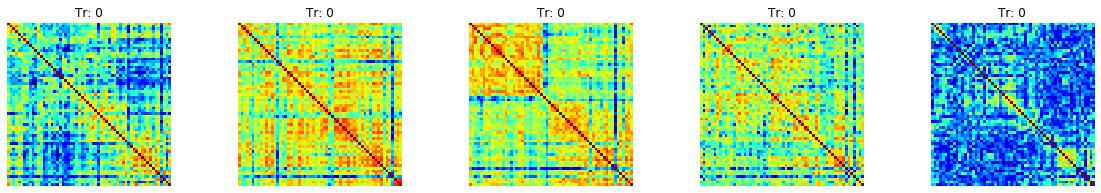

In [400]:
%%time

# on the whole matrix

import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


#n = 315 
n = 1000 
#LColors = [ 1, 12, 18, 23, 24, 26  ] 
#Donnees = np.zeros( ( len(LColors)*n, Matr.shape[0], Matr.shape[1]) ) 
#Donnees = np.zeros( ( len(LColors)*n, Matr.shape[0], Matr.shape[1]) ) 
Donnees = np.zeros( ( sum(Llen), Matr.shape[0], Matr.shape[1]) ) 
#Legends = np.empty( ( len(LColors)*n  ) ) 
Legends = []

s = 0 
for clr in LColors : 
    for d in range( n ) : 
        try :
            if (d in L_nan) : 
                pass
            else :
                # Load the TopLeft list
                color, Pxl = clr , d 
                title = str(f'Color {color}, Pixel {Pxl}, On {len(L)} dates').replace(' ','_') 
                filename = f"Label_{color}/Coherence_{color}/"+f'Coherence_Matrix_{title}.mat' 
                #filename = f"Label_{color}/Coherence_{color}/"+f'Covariance_Matrix_{title}.mat' 
                with open( filename, 'rb') as f:
                    Matr = np.load(f) 
                Donnees[ s ,:,:] = Matr 
                #Donnees[ s ,:,:] = Matr.diagonal(1)
                indx = LColors.index(color) 
                Legends.append( indx ) 
                #Legends.append(LabelsList()[int(color)]) # int(color) 
                s+=1
        except : 
            break


The_Images = Donnees 
print(70*'*') 
print( "The_Images.shape :" , The_Images.shape, '\n',"Legends.shape :" , len(Legends) ) 
print(70*'*') 
print( The_Images[n-1] ) 
print(70*'*') 

print(70*'*') 
print( The_Images[ len(LColors)*(n-1) ] ) 
print(70*'*') 

print(set(Legends)) 

#---------------------------------------------------------------
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 3) ) 
for ax, image, label in zip(axes, The_Images, Legends ) : 
    ax.set_axis_off() 
    ax.imshow(image, cmap=plt.cm.jet, interpolation='nearest') 
    #ax.set_title('Training: %i' % label) 
    ax.set_title('Tr: %s' % label) 
#---------------------------------------------------------------

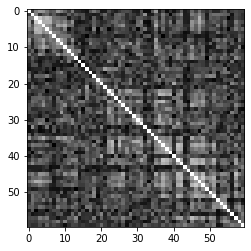

In [401]:
img = Matr
plt.imshow(img,cmap='gray') 

In [402]:
from glob import iglob
import pandas as pd

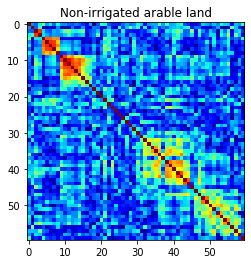

In [403]:
s = 1000
plt.title(f"{ LabelsList()[LColors[Legends[s]]]}") 
plt.imshow(Donnees[s,:,:], cmap='jet') 

plt.show()

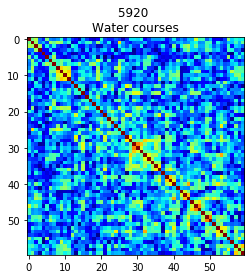

In [404]:

faces = pd.DataFrame([])
y_df = []
lin,col = 6, 40*1
show = True
for s in range( 1, (lin+1) ) : 
    #for jj in range(1,11) : 
    for jj in range(1,(col+1)) : 
        indc=1000*(s) - (jj*2)
        path = str(indc) 
        img=Donnees[indc,:,:] 
        y_df.append( Legends[indc] )
        if (show == True) :
            plt.title(f"{indc} \n{ LabelsList()[LColors[Legends[indc]]]}") 
            plt.imshow(Donnees[indc,:,:], cmap='jet') 
        #for path in range(10):
        face  = pd.Series(img.flatten(),name=path) #,name=path)
        faces = faces.append(face) 
#plt.show() 

y_df = np.array(y_df)

In [405]:
lin*col

240

In [406]:
faces.shape

(240, 3600)

Continuous urban fabric
Non-irrigated arable land
Broad-leaved forest
Coniferous forest
Natural grasslands
Water courses
Size of the analysed dataset : 240


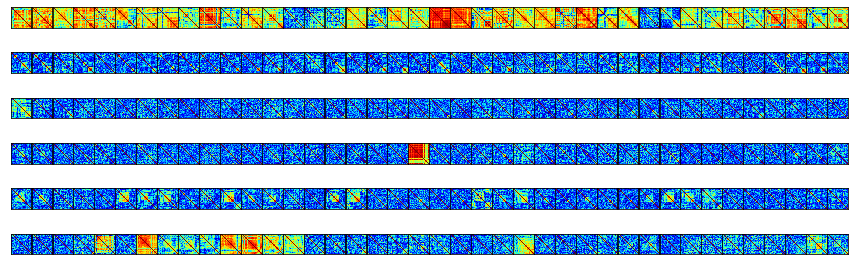

In [407]:
if (show == True):
    f=2.5

    fig, axes = plt.subplots(lin,col,figsize=(f*6,f*2), 
                             subplot_kw={'xticks':[], 'yticks':[]}, 
                             gridspec_kw=dict(hspace=.001, wspace=0.01)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces.iloc[i].values.reshape(60,60),cmap='jet') 
for i in LColors :
    print( LabelsList()[i] )
print( "Size of the analysed dataset :" , lin*col )

## 1) Fit the pca with the training features:

In [409]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=0.80)
faces_pca.fit(faces) 


PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [410]:
faces.shape

(240, 3600)

In [411]:
# Number of necessary eigenvectors
nbev, _= (faces_pca.components_).shape 
print("Number of necessary eigenvectors :", nbev)

Number of necessary eigenvectors : 53


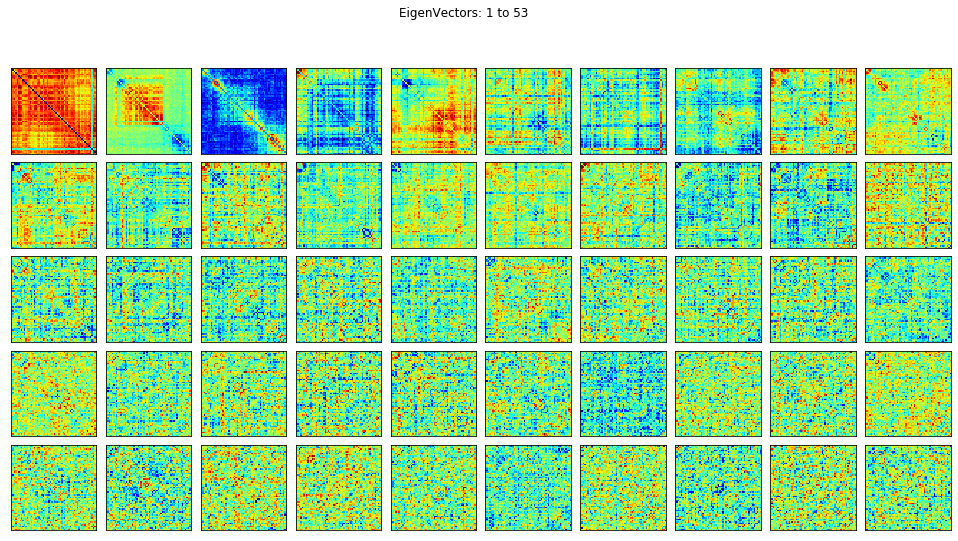

In [412]:
if show==True : 
    f = 1.7
    fig, axes = plt.subplots(5,int((nbev)/5),figsize=(f*10,f*5),
         subplot_kw={'xticks':[], 'yticks':[]},
         gridspec_kw=dict(hspace=0.1, wspace=0.01))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces_pca.components_[i].reshape(60,60),cmap='jet')
        #ax.set_title("kjhdg")
        t = plt.suptitle(f'EigenVectors: 1 to {nbev} ') 


##### With these Eigenvectors it is possible to redraw any of the faces on the dataset by executing transform of the PCA object to get the Eigenvectors out, and then inverse_transform on the Eigenvectors to get all the original images:

In [413]:
components = faces_pca.transform(faces) 
projected = faces_pca.inverse_transform(components)  


Continuous urban fabric
Non-irrigated arable land
Broad-leaved forest
Coniferous forest
Natural grasslands
Water courses
Size of the analysed dataset : 240


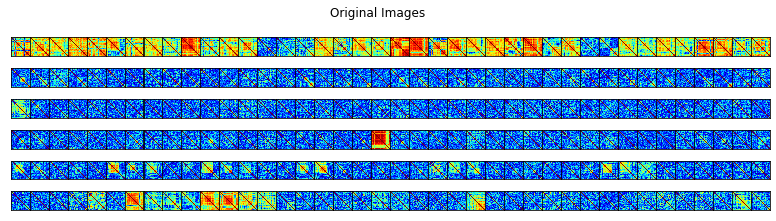

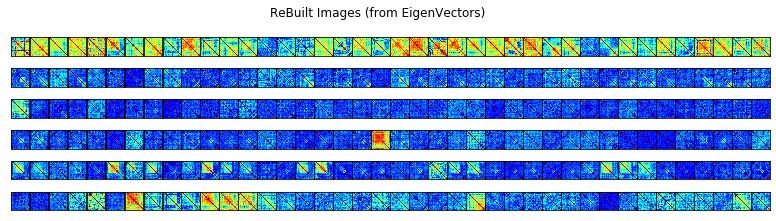

In [414]:
if show==True : 
    ########################################################################
    fig, axes = plt.subplots(lin,col,figsize=(f*8,f*2), 
                             subplot_kw={'xticks':[], 'yticks':[]}, 
                             gridspec_kw=dict(hspace=.001, wspace=0.001)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces.iloc[i].values.reshape(60,60),cmap='jet') 
        t = plt.suptitle(f'Original Images') 
    for i in LColors :
        print( LabelsList()[i] )
    print( "Size of the analysed dataset :" , lin*col )
    ########################################################################
    plt.show()
    fig, axes = plt.subplots(lin,col,figsize=(f*8,f*2),
                subplot_kw={'xticks':[], 'yticks':[]},
                gridspec_kw=dict(hspace=0.01, wspace=0.01))
    for i, ax in enumerate(axes.flat):
        ax.imshow(projected[i].reshape(60,60),cmap='jet')
        t = plt.suptitle(f'ReBuilt Images (from EigenVectors)') 
    plt.show()

#### As they where redrawn from the Eigenvectors with 80% of the variation in the dataset, the resulting images lost 20% of their definition.

In [415]:
faces.shape

(240, 3600)

In [416]:
pca = PCA(svd_solver='full', n_components=nbev) 
pca.fit( faces ) 

PCA(copy=True, iterated_power='auto', n_components=53, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [417]:
#X_df_pca=pca.transform( faces ) 
X_df_pca=pca.transform( faces ) 
print('Number of feature dimensions:'+ str(len(X_df_pca[0])) ) 

Number of feature dimensions:53


In [418]:
y_df.shape

(240,)

In [419]:
LColors = np.array(LColors) 
LabelsL = np.array(LabelsList())

In [420]:
#LColors 
list(set(y_df))

[0, 1, 2, 3, 4, 5]

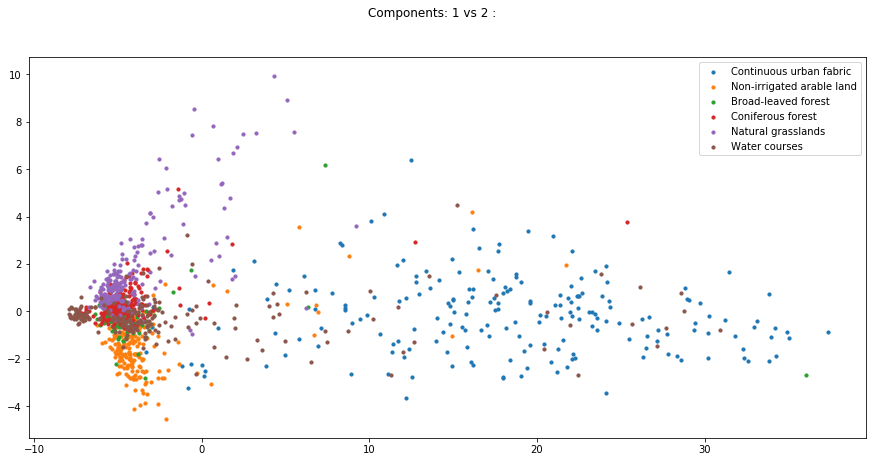

In [397]:
"""
plt.figure(figsize=(15,5)) 
#ax = plt.subplot(1,2,1) 
ax = plt.subplot() 
#plt.scatter(np.transpose(X_df_pca)[0], np.transpose(X_df_pca)[1], c=y_df, s=1, cmap='jet') 
plt.scatter(np.transpose(X_df_pca)[0], 
            np.transpose(X_df_pca)[1], 
            c=y_df, 
            s=5, cmap='Paired_r',
            label=LabelsL[LColors[y_df]][0] ) 
"""
plt.figure(figsize=(15,7)) 
ax = plt.subplot() 
for i in list(set(y_df)) :
    px = X_df_pca[:,0][ y_df== i ] 
    py = X_df_pca[:,1][ y_df== i ]
    plt.scatter(px,py,label=LabelsList()[LColors[i]] , s=10) 
plt.legend(loc='upper right') 
t = plt.suptitle(f'Components: 1 vs 2 : ') 